# Evaluating Weather Differences Across Latitudes Using Cities Worldwide

### WeatherAPI data using Python, pandas, matplotlib/seaborn, citipy

-------

### There are three sections to this analysis: 
#### 1. data setup (citipy, API call to OpenWeather)
#### 2. graphing and analysis of variable differences across latitude
#### 3. summary findings of each analysis



* Setup environment

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


* Gather city data

In [4]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        #print(city)
    #print to file        
    with open('city_output.txt', 'w') as f:
                f.write('\n'.join(cities))
# Print the city count to confirm sufficient count
print(len(cities))



615


* Prepare and run the api call

In [5]:
from api_keys import api_key

In [6]:
#create df to hold it, start with dict then convert to df

city_weather = {'City':[],
                'Country':[],
                'Cloudiness':[],
                'Date':[],
                'Humidity':[],
                'Lat':[],
                'Lng':[],
                'Max Temp':[],
                'Min Temp':[],
                'Pressure':[],
                'Wind Speed':[],
                'Real Feel Temp':[],
                'City ID':[]}

#loop over cities and add data
for city in cities:
    base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

    try:
        req=requests.get(base_url + f'&q={city}') 
        data = req.json()
        
        #add values to our city_weather dictionary
        city_weather['City'].append(data['name'])
        city_weather['Country'].append(data['sys']['country'])
        city_weather['Cloudiness'].append(data['clouds']['all'])
        city_weather['Date'].append(data['dt'])
        city_weather['Humidity'].append(data['main']['humidity'])
        city_weather['Lat'].append(data['coord']['lat'])
        city_weather['Lng'].append(data['coord']['lon'])
        city_weather['Max Temp'].append(data['main']['temp_max'])
        city_weather['Min Temp'].append(data['main']['temp_min'])
        city_weather['Pressure'].append(data['main']['pressure'])
        city_weather['Wind Speed'].append(data['wind']['speed'])
        city_weather['Real Feel Temp'].append(data['main']['feels_like'])
        #city_weather['Elevation'].append(data['main']['pressure']) try this with the forecast
        city_weather['City ID'].append(data['id'])
        
        print("processing " + city)
        
    except:
        print(city + " not found")
        pass  #continue on to the next part of loop
    


processing ushuaia
processing keetmanshoop
processing kot khai
processing atuona
processing albany
belushya guba not found
processing coquimbo
processing los llanos de aridane
sentyabrskiy not found
processing airai
processing rikitea
processing half moon bay
sidi qasim not found
processing gushikawa
processing amarillo
processing synya
processing tema
processing goderich
processing saskylakh
processing katsuura
processing kodiak
processing baruun-urt
processing san ignacio
processing steamboat springs
processing port blair
processing elat
processing mantua
processing bluff
processing devils lake
sorvag not found
processing butaritari
processing carnarvon
tumannyy not found
abu jubayhah not found
processing sonderborg
taolanaro not found
processing codrington
processing anadyr
processing bonthe
processing mataura
processing lucapa
processing faya
processing padang
processing qaanaaq
tawkar not found
processing geraldton
processing nanortalik
processing narsaq
processing jepara
processi

processing virbhadra
processing griffith
processing portobelo
processing beyneu
processing kawambwa
processing kaupanger
satitoa not found
processing fuyang
gulshat not found
processing castelldefels
processing kodinsk
processing bago
processing mokhsogollokh
processing natal
kuche not found
processing san jose
processing avarua
processing dehloran
processing fairbanks
processing broome
processing te anau
processing bodden town
processing bokovskaya
processing vardo
processing magadan
processing komsomolskiy
processing kinshasa
processing sao joao evangelista
processing skibbereen
processing sertanopolis
processing mineiros
processing mount gambier
processing podgorica
marcona not found
processing brae
processing mandalgovi
processing vila velha
processing weihai
processing tiznit
processing xai-xai
alotau not found
processing port hardy
khonuu not found
processing bambanglipuro
processing denpasar
processing bethanien
processing kavaratti
processing champagnole
processing iquitos
kara

In [ ]:
print(city_weather)

* Get output into pandas dataframe

In [7]:
city_weather_df = pd.DataFrame.from_dict(city_weather)
print(city_weather_df)


                       City Country  Cloudiness        Date  Humidity  \
0                   Ushuaia      AR          75  1634686322        62   
1              Keetmanshoop      NA          22  1634686530        34   
2                   Kotkhai      IN           0  1634686530        74   
3                    Atuona      PF           2  1634686531        76   
4                    Albany      US          12  1634686287        60   
5                  Coquimbo      CL          75  1634686396        82   
6     Los Llanos de Aridane      ES           0  1634686533        56   
7                     Airai      TL          72  1634686534        40   
8                   Rikitea      PF           2  1634686325        77   
9             Half Moon Bay      US          75  1634686536        46   
10                Gushikawa      JP          90  1634686537        78   
11                 Amarillo      US           1  1634686413        20   
12                    Synya      RU         100  16

* Output dataframe to csv file

In [8]:
#print dataframe to csv file
city_weather_df.to_csv(r'city_weather.csv')

PermissionError: [Errno 13] Permission denied: 'city_weather.csv'

* Added 'hemisphere' data column to dataframe for additional analysis

In [9]:
#add hemisphere column            
city_weather_df["Hemisphere"] = ["Northern" if x>=0 else "Southern" for x in city_weather_df["Lat"]]

* Added 'region' data column to dataframe for additional analysis

In [32]:
#adding regional categories

regional = []

for lat in city_weather_df["Lat"]:
    if (lat>0 and lat<=10) or (lat<0 and lat>=-10):
        regional.append("Equatorial")
    elif  (lat>10 and lat<=30) or (lat<-10 and lat>=-30):
        regional.append("Subtropical")
    elif  (lat>30 and lat<=60) or (lat<-30 and lat>=-60):
        regional.append("Subpolar")
    else:
        regional.append("Polar")

regional_df = pd.DataFrame(regional)

city_weather_df2=pd.concat([city_weather_df,regional_df],axis=1)
city_weather_df3=pd.DataFrame(city_weather_df2).rename(columns={0: "Region"})
city_weather_df3

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Min Temp,Pressure,Wind Speed,Real Feel Temp,City ID,Hemisphere,Region
0,Ushuaia,AR,75,1634686322,62,-54.8000,-68.3000,53.26,53.26,998,23.02,51.21,3833367,Southern,Subpolar
1,Keetmanshoop,NA,22,1634686530,34,-26.5833,18.1333,72.16,72.16,1011,20.96,70.66,3356264,Southern,Subtropical
2,Kotkhai,IN,0,1634686530,74,31.1167,77.5333,53.19,53.19,1016,2.80,51.67,1265972,Northern,Subpolar
3,Atuona,PF,2,1634686531,76,-9.8000,-139.0333,78.22,78.22,1013,17.69,79.32,4020109,Southern,Equatorial
4,Albany,US,12,1634686287,60,42.6001,-73.9662,59.31,49.55,1010,12.26,53.28,5106841,Northern,Subpolar
5,Coquimbo,CL,75,1634686396,82,-29.9533,-71.3436,56.93,56.93,1017,6.91,56.17,3893629,Southern,Subtropical
6,Los Llanos de Aridane,ES,0,1634686533,56,28.6585,-17.9182,69.55,69.55,1020,10.36,68.83,2514651,Northern,Subtropical
7,Airai,TL,72,1634686534,40,-8.9266,125.4092,74.17,74.17,1016,3.13,73.17,1651810,Southern,Equatorial
8,Rikitea,PF,2,1634686325,77,-23.1203,-134.9692,75.18,75.18,1021,20.42,76.03,4030556,Southern,Subtropical
9,Half Moon Bay,US,75,1634686536,46,37.4636,-122.4286,71.92,57.97,1014,6.91,63.25,5354943,Northern,Subpolar


## Exploratory Analysis Section

------------

Created scatterplots using matplotlib and seaborn to evaluate the following relationships:

* Cloudiness (%) vs. Latitude
* Humidity (%) vs. Latitude
* Wind Speed (mph) vs. Latitude
* Max Temperature (F) vs. Latitude
* Min Temperature (F) vs. Latitude
* "Real Feel" Temperature (F) vs. Latitude
* Atmospheric pressure vs. Latitude

In [13]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

#simplify names for reference
df=city_weather_df
lat = "Lat"
c = "Cloudiness"
h = "Humidity"
maxt = "Max Temp"
mint = "Min Temp"
rft = "Real Feel Temp"
p = "Pressure"
w = "Wind Speed"

Cloudiness (%) vs. Latitude

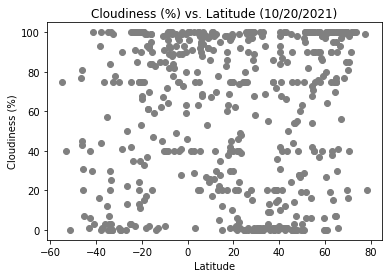

In [14]:
plt.scatter(x=df[lat],y=df[c], color='gray')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Cloudiness (%) vs. Latitude (10/20/2021)")
plt.show()

Humidity (%) vs. Latitude

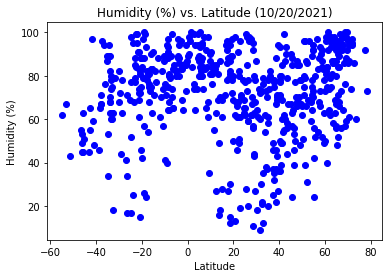

In [15]:
plt.scatter(x=df[lat],y=df[h], color='blue')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Humidity (%) vs. Latitude (10/20/2021)")
plt.show()

Wind Speed (mph) vs. Latitude

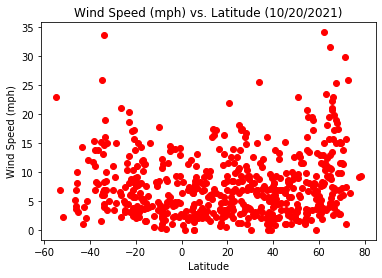

In [16]:
plt.scatter(x=df[lat],y=df[w], color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("Wind Speed (mph) vs. Latitude (10/20/2021)")
plt.show()

Max Temperature (F) vs. Latitude

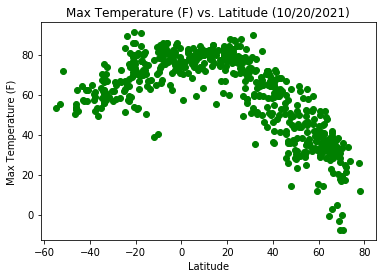

In [17]:
plt.scatter(x=df[lat],y=df[maxt], color="green")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("Max Temperature (F) vs. Latitude (10/20/2021)")
plt.show()

Min Temperature (F) vs. Latitude

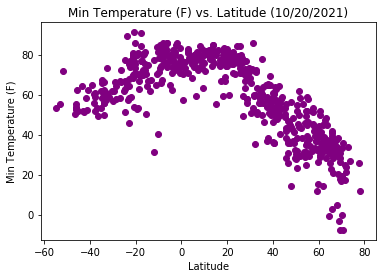

In [18]:
plt.scatter(x=df[lat],y=df[mint], color="purple")
plt.ylabel("Min Temperature (F)")
plt.xlabel("Latitude")
plt.title("Min Temperature (F) vs. Latitude (10/20/2021)")
plt.show()

"Real Feel" Temperature (F) vs. Latitude

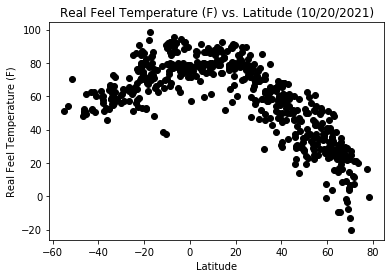

In [19]:
plt.scatter(x=df[lat],y=df[rft], color="black")
plt.ylabel("Real Feel Temperature (F)")
plt.xlabel("Latitude")
plt.title("Real Feel Temperature (F) vs. Latitude (10/20/2021)")
plt.show()

Atmospheric pressure vs. Latitude

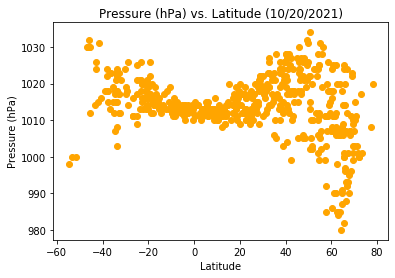

In [20]:
plt.scatter(x=df[lat],y=df[p], color="orange")
plt.ylabel("Pressure (hPa)")
plt.xlabel("Latitude")
plt.title("Pressure (hPa) vs. Latitude (10/20/2021)")
plt.show()

----------------

Created scatterplots using seaborn and seaborn to evaluate the following relationships:

* Cloudiness (%) vs. Latitude
* Humidity (%) vs. Latitude
* Wind Speed (mph) vs. Latitude
* Max Temperature (F) vs. Latitude
* Min Temperature (F) vs. Latitude
* "Real Feel" Temperature (F) vs. Latitude
* Atmospheric pressure vs. Latitude

In [21]:
import seaborn as sns

Cloudiness (%) vs. Latitude

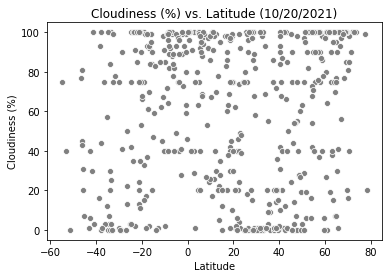

In [22]:
ax = sns.scatterplot(x=lat, y=c, data=df, color="gray")
ax.set_title("Cloudiness (%) vs. Latitude (10/20/2021)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
plt.show()

Humidity (%) vs. Latitude

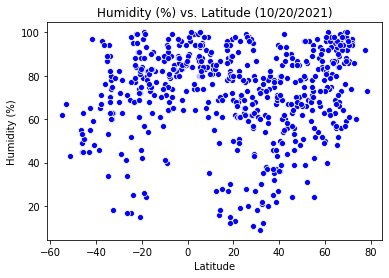

In [23]:
ax = sns.scatterplot(x=lat, y=h, data=df, color="blue")
ax.set_title("Humidity (%) vs. Latitude (10/20/2021)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
plt.show()

Wind Speed (mph) vs. Latitude

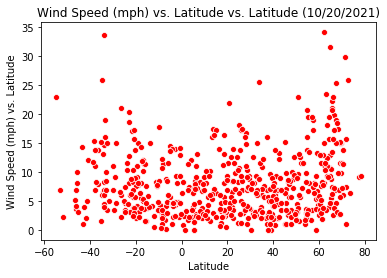

In [24]:
ax = sns.scatterplot(x=lat, y=w, data=df, color="red")
ax.set_title("Wind Speed (mph) vs. Latitude vs. Latitude (10/20/2021)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph) vs. Latitude")
plt.show()

Max Temperature (F) vs. Latitude

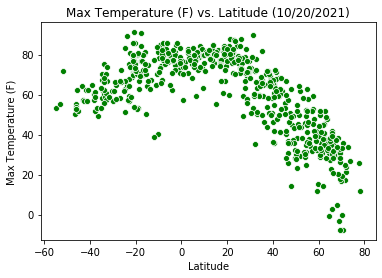

In [25]:
ax = sns.scatterplot(x=lat, y=maxt, data=df, color="green")
ax.set_title("Max Temperature (F) vs. Latitude (10/20/2021)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
plt.show()

Pressure (hPa) vs. Latitude

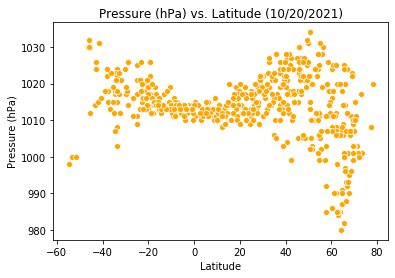

In [26]:
ax = sns.scatterplot(x=lat, y=p, data=df, color="orange")
ax.set_title("Pressure (hPa) vs. Latitude (10/20/2021)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Pressure (hPa)")
plt.show()

## Advanced Analysis and Observed Trends

------------

The 

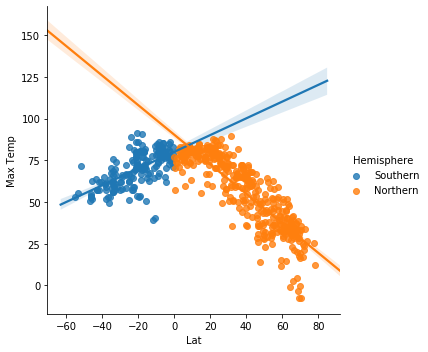

In [27]:
#correlation
ax.set_title("Max Daily Temperature vs. Latitude (10/20/2021) - Comparing Hemispheres")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Daily Temp (F)")

sns.lmplot(x="Lat", y="Max Temp", hue="Hemisphere", data=city_weather_df)
plt.show()

In [28]:
from scipy import stats

northern_df = city_weather_df[city_weather_df["Hemisphere"] == "Northern"]
southern_df = city_weather_df[city_weather_df["Hemisphere"] == "Southern"]

print("NOTE: the output here may differ with each API call")
#Northern Hemisphere correlation
print("Northern Hemisphere Max Temp and Latitude correlation statistics: ",
      stats.pearsonr(northern_df['Lat'], northern_df['Max Temp']))
#Southern Hemisphere correlation
print("Southern Hemisphere Max Temp and Latitude correlation statistics: ",
      stats.pearsonr(southern_df['Lat'], southern_df['Max Temp']))   



NOTE: the output here may differ with each API call
Northern Hemisphere Max Temp and Latitude correlation statistics:  (-0.8620269786000098, 2.245796244156527e-115)
Southern Hemisphere Max Temp and Latitude correlation statistics:  (0.6169146967697625, 7.751293019032125e-20)


Equatorial Pressure (hPa) vs. Latitude

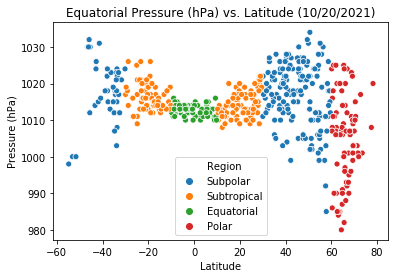

In [35]:

ax = sns.scatterplot(x="Lat", y="Pressure", data=city_weather_df3, hue="Region")
ax.set_title("Equatorial Pressure (hPa) vs. Latitude (10/20/2021)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Pressure (hPa)")
plt.show()

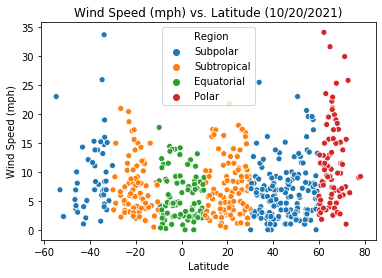

In [42]:

ax = sns.scatterplot(x="Lat", y="Wind Speed", data=city_weather_df3, hue="Region")
ax.set_title("Wind Speed (mph) vs. Latitude (10/20/2021)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
plt.show()

In [ ]:
ax = sns.scatterplot(x=lat, y=p, data=df, hue="Region2")
ax.set_title("Equatorial Pressure (hPa) vs. Latitude (10/20/2021)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Pressure (hPa)")
plt.show()

In [ ]:
sns.lmplot(x=p, y=w, data=df, hue="Region")
#ax = sns.scatterplot(x=p, y=maxt, data=df, color="pink")
ax.set_title("Max Temp (F) vs. Pressure (hPa) (10/20/2021)")
ax.set_xlabel("Pressure (hPa)")
ax.set_ylabel("Max Temp (F)")
plt.show()

## three observable trends based on the data

Summary findings:  Max temperature increases as latitude reaches 0° (the equator) and decreases as latitude approaches the poles (90°).  The best fit regression line would be polynomial, but for simplicity, the dataset was split into Northern and Southern Hemispheres to evaluate the correlation using a linear regression model.  Northern hemisphere latitudes are highly negatively correlated (r2 = -0.8 depending on API call), meaning that as you move north (higher latitudes) there is a decrease in temperature.  The same relationship exists for the Southern hemisphere, with a moderate positive correlation (r2 = 0.6 depending on API call), meaning as latitude approaches the south pole the temperature decreases.  The interpretation is slightly different for Southern hemisphere because latitudes are negative.

--------

doldrums equatorial low presure trough 0-10, tradewinds
subtrop 30 hot and dry

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

## Note that the cities tend to be the same when you re-run it with citipy - investigate how "random" it really is.  Bootstrap it?

## OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.

## OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

## Hints and Considerations

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

 